# Nov 10th, 2022 (AD: copy data)

**Motivation**: copied data from /Hadi_AD to raw folder  <br>

In [1]:
# HIDE CODE


import os
import sys
from pprint import pprint
from copy import deepcopy as dc
from os.path import join as pjoin
from scipy.ndimage import gaussian_filter
from IPython.display import display, IFrame, HTML

# tmp & extras dir
git_dir = pjoin(os.environ['HOME'], 'Dropbox/git')
extras_dir = pjoin(git_dir, 'jb-Ca-fMRI/_extras')
fig_base_dir = pjoin(git_dir, 'jb-Ca-fMRI/figs')
tmp_dir = pjoin(git_dir, 'jb-Ca-fMRI/tmp')

# GitHub
sys.path.insert(0, pjoin(git_dir, '_Ca-fMRI'))
from figures.fighelper import *
from analysis.final import *
from utils.render import *

# warnings, tqdm, & style
warnings.filterwarnings('ignore', category=DeprecationWarning)
from tqdm.notebook import tqdm
%matplotlib inline
set_style()

In [2]:
def _xt(f, space: str = 'common'):
    sub = [e.split('-')[1] for e in f.name.split('_') if 'sub' in e].pop()
    ses = [e.split('-')[1] for e in f.name.split('_') if 'ses' in e].pop()
    run = [e.split('-')[1] for e in f.name.split('_') if 'run' in e].pop()
    task = [e.split('-')[1] for e in f.name.split('_') if 'task' in e].pop()
    name = '_'.join([
        f"sub-{sub}",
        f"ses-{ses}",
        f"run-{run}",
        f"task-{task}",
        f"space-{space}",
        f"desc-{desc}",
    ])
    return sub, ses, run, task, name


def _sort(key):
    if isinstance(key, tuple):
        key = key[0]
    ses, run = key.split('_')
    run = int(re.findall(r'\d+', run).pop())
    ses = int(re.findall(r'\d+', ses).pop())
    return ses * 100 + run


def ses_cond(ses):
    se = list(filter(None, re.split('(\d+)', ses)))
    if len(se) == 1:
        cond = ''
        se = int(se[0])
    elif len(se) == 2:
        cond = str(se[1])
        se = int(se[0])
    else:
        raise RuntimeError
    return se, cond

## Generate new parcel

In [3]:
# mice = Mice(512)
# mice.parcel.fit_parcel()

## Dirs

In [3]:
raw_dir = '/mnt/storage/hadi/Ca-fMRI/raw'
meta_dir = '/home/hadi/Documents/Ca-fMRI/meta_info'
data_dir = '/mnt/storage/hadi/Ca-fMRI/Hadi_AD'

In [4]:
for f in sorted(os.listdir(raw_dir)):
    if 'sub-DKI' in f or 'sub-WT' in f:
        os.remove(pjoin(raw_dir, f))

## Copy files

In [5]:
space = 'common'
base_dir = pjoin(
    data_dir,
    f"{space}_space",
    'confound_FC_MOT6_WM' if space == 'common'
    else 'confound_correction_FC_MOT6_WM',
    'confound_correction_datasink',
)
os.listdir(base_dir)

['frame_censoring_mask', 'plot_CR_overfit', 'cleaned_timeseries']

### fMRI

In [6]:
%%time

path = pjoin(base_dir, 'cleaned_timeseries')
files = pathlib.Path(path).rglob('**/*.nii.gz')

desc = 'fc-mot6-wm'
present = collections.defaultdict(dict)
for f in files:
    if 'run' not in f.name:
        continue
    sub, ses, run, task, name = _xt(f, space)
    name = f"{name}_bold.nii.gz"
    present[sub][f"ses-{ses}_run-{run}"] = name
    
    dst = pjoin(raw_dir, name)
    if not os.path.isfile(dst):
        shutil.copyfile(
            src=str(f),
            dst=dst,
        )
present = {
    k: dict(sorted(v.items(), key=_sort))
    for k, v in present.items()
}
present = dict(sorted(present.items()))

CPU times: user 115 ms, sys: 20.8 s, total: 20.9 s
Wall time: 1min 47s


In [7]:
present

{
    'DKI06': {
        'ses-1_run-14': 'sub-DKI06_ses-1_run-14_task-rest_space-common_desc-fc-mot6-wm_bold.nii.gz',
        'ses-1_run-16': 'sub-DKI06_ses-1_run-16_task-rest_space-common_desc-fc-mot6-wm_bold.nii.gz',
        'ses-1_run-18': 'sub-DKI06_ses-1_run-18_task-rest_space-common_desc-fc-mot6-wm_bold.nii.gz'
    },
    'DKI07': {
        'ses-1_run-7': 'sub-DKI07_ses-1_run-7_task-rest_space-common_desc-fc-mot6-wm_bold.nii.gz',
        'ses-1_run-9': 'sub-DKI07_ses-1_run-9_task-rest_space-common_desc-fc-mot6-wm_bold.nii.gz',
        'ses-1_run-11': 'sub-DKI07_ses-1_run-11_task-rest_space-common_desc-fc-mot6-wm_bold.nii.gz',
        'ses-2_run-10': 'sub-DKI07_ses-2_run-10_task-rest_space-common_desc-fc-mot6-wm_bold.nii.gz',
        'ses-2_run-13': 'sub-DKI07_ses-2_run-13_task-rest_space-common_desc-fc-mot6-wm_bold.nii.gz',
        'ses-2_run-15': 'sub-DKI07_ses-2_run-15_task-rest_space-common_desc-fc-mot6-wm_bold.nii.gz'
    },
    'DKI08': {
        'ses-1_run-17': 'sub-DKI08_ses-1_run-17_task-rest_space-common_desc-fc-mot6-wm_bold.nii.gz',
        'ses-1_run-19': 'sub-DKI08_ses-1_run-19_task-rest_space-common_desc-fc-mot6-wm_bold.nii.gz',
        'ses-1_run-21': 'sub-DKI08_ses-1_run-21_task-rest_space-common_desc-fc-mot6-wm_bold.nii.gz'
    },
    'DKI09': {
        'ses-1_run-8': 'sub-DKI09_ses-1_run-8_task-rest_space-common_desc-fc-mot6-wm_bold.nii.gz',
        'ses-1_run-10': 'sub-DKI09_ses-1_run-10_task-rest_space-common_desc-fc-mot6-wm_bold.nii.gz',
        'ses-1_run-12': 'sub-DKI09_ses-1_run-12_task-rest_space-common_desc-fc-mot6-wm_bold.nii.gz',
        'ses-2_run-8': 'sub-DKI09_ses-2_run-8_task-rest_space-common_desc-fc-mot6-wm_bold.nii.gz',
        'ses-2_run-10': 'sub-DKI09_ses-2_run-10_task-rest_space-common_desc-fc-mot6-wm_bold.nii.gz',
        'ses-2_run-12': 'sub-DKI09_ses-2_run-12_task-rest_space-common_desc-fc-mot6-wm_bold.nii.gz'
    },
    'DKI10': {
        'ses-1_run-8': 'sub-DKI10_ses-1_run-8_task-rest_space-common_desc-fc-mot6-wm_bold.nii.gz',
        'ses-1_run-10': 'sub-DKI10_ses-1_run-10_task-rest_space-common_desc-fc-mot6-wm_bold.nii.gz',
        'ses-1_run-12': 'sub-DKI10_ses-1_run-12_task-rest_space-common_desc-fc-mot6-wm_bold.nii.gz'
    },
    'DKI11': {
        'ses-1_run-8': 'sub-DKI11_ses-1_run-8_task-rest_space-common_desc-fc-mot6-wm_bold.nii.gz',
        'ses-1_run-10': 'sub-DKI11_ses-1_run-10_task-rest_space-common_desc-fc-mot6-wm_bold.nii.gz',
        'ses-1_run-13': 'sub-DKI11_ses-1_run-13_task-rest_space-common_desc-fc-mot6-wm_bold.nii.gz',
        'ses-2_run-7': 'sub-DKI11_ses-2_run-7_task-rest_space-common_desc-fc-mot6-wm_bold.nii.gz',
        'ses-2_run-9': 'sub-DKI11_ses-2_run-9_task-rest_space-common_desc-fc-mot6-wm_bold.nii.gz',
        'ses-2_run-11': 'sub-DKI11_ses-2_run-11_task-rest_space-common_desc-fc-mot6-wm_bold.nii.gz'
    },
    'DKI12': {
        'ses-1_run-11': 'sub-DKI12_ses-1_run-11_task-rest_space-common_desc-fc-mot6-wm_bold.nii.gz',
        'ses-1_run-13': 'sub-DKI12_ses-1_run-13_task-rest_space-common_desc-fc-mot6-wm_bold.nii.gz',
        'ses-1_run-15': 'sub-DKI12_ses-1_run-15_task-rest_space-common_desc-fc-mot6-wm_bold.nii.gz',
        'ses-2_run-10': 'sub-DKI12_ses-2_run-10_task-rest_space-common_desc-fc-mot6-wm_bold.nii.gz',
        'ses-2_run-12': 'sub-DKI12_ses-2_run-12_task-rest_space-common_desc-fc-mot6-wm_bold.nii.gz',
        'ses-2_run-14': 'sub-DKI12_ses-2_run-14_task-rest_space-common_desc-fc-mot6-wm_bold.nii.gz'
    },
    'DKI14': {
        'ses-1_run-7': 'sub-DKI14_ses-1_run-7_task-rest_space-common_desc-fc-mot6-wm_bold.nii.gz',
        'ses-1_run-9': 'sub-DKI14_ses-1_run-9_task-rest_space-common_desc-fc-mot6-wm_bold.nii.gz',
        'ses-1_run-11': 'sub-DKI14_ses-1_run-11_task-rest_space-common_desc-fc-mot6-wm_bold.nii.gz'
    },
    'DKI15': {
        'ses-1_run-12': 'sub-DKI15_ses-1_run-12_task-rest_space-common_desc-fc-mot6-wm_bold.nii.gz',
        'ses-1_run-14': 'sub-DKI15_ses-1_run-14_task-rest_space-common_desc-fc-mot6-wm_bold.nii.gz

### Rename, save meta run info

In [8]:
df = []
for su, d in present.items():
    sessions = np.unique([
        ses_cond(e.split('_')[0].split('-')[-1])[0]
        for e in d
    ])
    sessions = {
        se: len([x for x in d if f'ses-{se}' in x])
        for se in sessions
    }
    ru_new = 1
    for k, f in d.items():
        se, ru = k.split('_')
        ru = int(ru.split('-')[-1])
        se = se.split('-')[-1]
        se, cond = ses_cond(se)
        df.append({
            'sub': [su],
            'ses': [se],
            'run': [ru],
            'cond': [cond],
            'run_new': [ru_new],
        })
        key_new = f"sub-{su}_ses-{se}_run-{ru_new}"
        f_new = f"{key_new}_{'_'.join(f.split('_')[3:])}"
        os.rename(
            src=pjoin(raw_dir, f),
            dst=pjoin(raw_dir, f_new),
        )
        ru_new += 1
        if ru_new > sessions[se]:
            ru_new -= sessions[se]

df = pd.DataFrame(merge_dicts(df))
df.to_csv(pjoin(meta_dir, 'runs_ad.csv'))

### frame censoring

In [9]:
path = pjoin(base_dir, 'frame_censoring_mask')
files = pathlib.Path(path).rglob('**/*.csv')

df = []
for f in files:
    if 'run' not in f.name:
        continue
    sub, ses, run, task, _ = _xt(f)
    if f"ses-{ses}_run-{run}" not in present[sub]:
        print(f"Warning, missing:\n{f.name}")

    vals = pd.read_csv(str(f)).values.ravel()
    ses, cond = ses_cond(ses)
    key = f"sub-{sub}_ses-{ses}_run-{run}"
    df.append({
        'sub': [sub] * len(vals),
        'ses': [ses] * len(vals),
        'run': [int(run)] * len(vals),
        'key': [key] * len(vals),
        'cond': [cond] * len(vals),
        'temporal_mask': vals.astype(int),
    })

df = pd.DataFrame(merge_dicts(df))
df = df.sort_values(['sub', 'ses', 'run'])
_ = save_obj(
    obj=df,
    file_name='tmask_ad',
    save_dir=meta_dir,
    mode='df',
)

[PROGRESS] 'tmask_ad.df' saved at
/home/hadi/Documents/Ca-fMRI/meta_info

In [10]:
df['cond'].unique()

array(['', 'awakecontrol', 'anesthesia'], dtype=object)

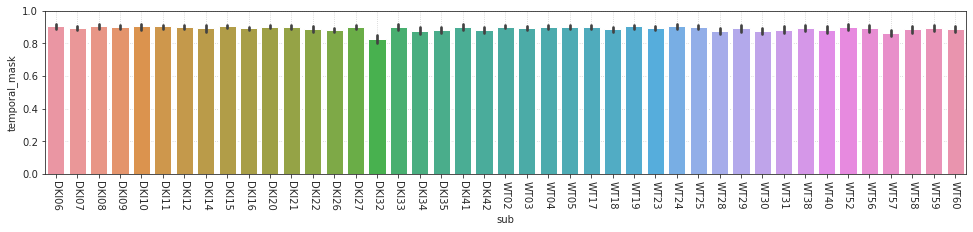

In [11]:
fig, ax = create_figure(figsize=(16.5, 3))
sns.barplot(
    data=df,
    x='sub',
    y='temporal_mask',
    order=sorted(df['sub'].unique()),
    ax=ax,
)
ax.tick_params('x', rotation=-90)
ax.set_ylim(0, 1)
ax.grid()
plt.show()

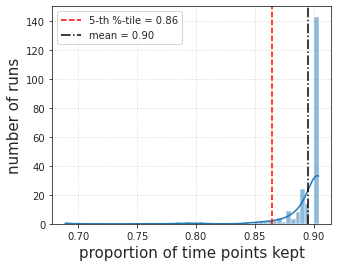

In [12]:
_df = df.groupby(['key']).mean()

fig, ax = create_figure(1, 1, (5, 4))

sns.histplot(_df, x='temporal_mask', kde=True, ax=ax)
q = _df['temporal_mask'].quantile(q=0.05)
ax.axvline(q, color='r', ls='--', label=f'5-th %-tile = {q:0.2f}')
q = _df['temporal_mask'].mean()
ax.axvline(q, color='k', ls='-.', label=f'mean = {q:0.2f}')
ax.set_xlabel('proportion of time points kept', fontsize=15)
ax.set_ylabel('number of runs', fontsize=15)
ax.legend()
ax.grid()

plt.show()

### Anat

In [13]:
path = pjoin(data_dir, 'anat')
files = pathlib.Path(path).rglob('**/*.nii.gz')

In [14]:
for f in files:
    sub = [e.split('-')[1] for e in f.name.split('_') if 'sub' in e].pop()
    ses = [e.split('-')[1] for e in f.name.split('_') if 'ses' in e].pop()
    acq = [e.split('-')[1] for e in f.name.split('_') if 'acq' in e].pop()
    ses, _ = ses_cond(ses)

    name = '_'.join([
        f"sub-{sub}",
        f"ses-{ses}",
        f"acq-{acq}",
        'T1w.nii.gz',
    ])
    dst = pjoin(raw_dir, name)
    if not os.path.isfile(dst):
        shutil.copyfile(
            src=str(f),
            dst=dst,
        )

In [15]:
x = ants.image_read(str(f))
x.shape

(88, 44, 78)

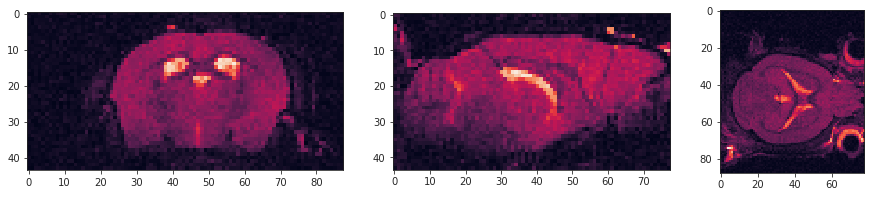

In [16]:
fig, axes = create_figure(1, 3, (15, 5), width_ratios=[1.14, 1, 0.52])

axes[0].imshow(x[:, :, 40].T)
axes[1].imshow(x[48])
axes[2].imshow(x[:, 16, :])
plt.show()